In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cols = ['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']

In [7]:
from matplotlib import style
plt.style.use(['dark_background'])
style.use('seaborn-ticks')
sns.set(color_codes=True)

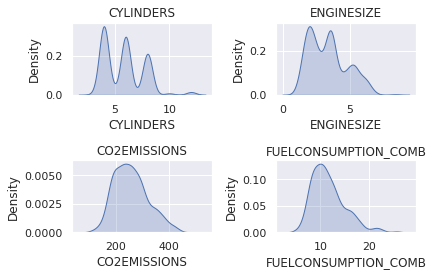

In [8]:
fig,axs = plt.subplots(nrows = 2,ncols = 2)
j = 0
k = 0
for i in cols:
    p = sns.kdeplot(df[i],shade = True, ax = axs[j][k])
    p.set_title(i)
    if j==0 and k==0:
        k = k+1
    elif k==1 and j==0:
        k = 0
        j = 1
    else:
        k = 1
        j = 1
plt.tight_layout()

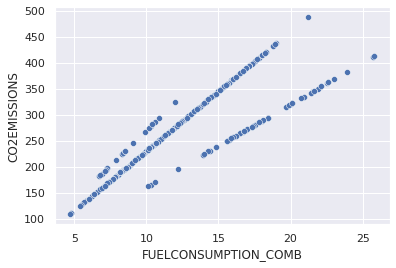

In [9]:
sns.scatterplot(x = "FUELCONSUMPTION_COMB",y = "CO2EMISSIONS",data = df);

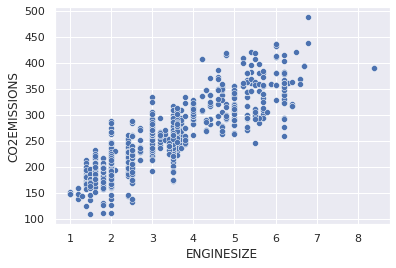

In [10]:
sns.scatterplot(x = "ENGINESIZE",y = "CO2EMISSIONS",data = df);

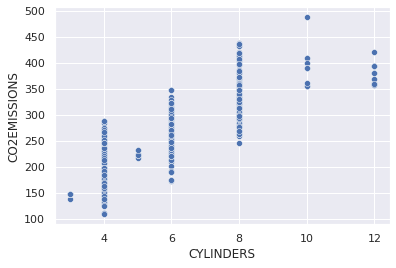

In [11]:
sns.scatterplot(x = "CYLINDERS",y = "CO2EMISSIONS",data = df);

In [12]:
msk = np.random.rand(len(df)) < 0.85

In [13]:
train = df[cols][msk]
test = df[cols][~msk]

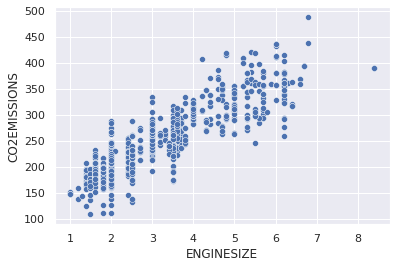

In [14]:
sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = train);

In [15]:
train_x = np.array(train['ENGINESIZE']).reshape(-1,1)
train_y = np.array(train['CO2EMISSIONS']).reshape(-1,1)

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(train_x,train_y)

LinearRegression()

In [18]:
print(reg.intercept_)
print(reg.coef_)

[125.95124375]
[[38.99528493]]


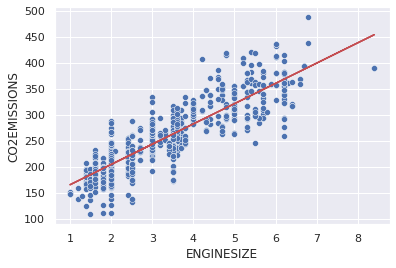

In [19]:
fig , axs = plt.subplots(nrows = 1)
p = sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = train, ax = axs);
z = (train_x * reg.coef_) + (reg.intercept_)
p.plot(train_x,z,'-r');

In [20]:
test_x = np.array(test["ENGINESIZE"]).reshape(-1,1)
test_y = np.array(test["CO2EMISSIONS"]).reshape(-1,1)

In [21]:
y_pred = reg.predict(test_x)

In [22]:
print("Root mean square error: %0.2f" %r2_score(test_y,y_pred))

Root mean square error: 0.77
